In [267]:
import pandas as pd
import numpy as np
from tensorflow import keras
from  sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
label_encoder = LabelEncoder()

InputLayer = keras.layers.InputLayer()
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout
Dense = keras.layers.Dense 
import seaborn as sb

In [268]:
df = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_no_auto_dialer.csv')

df_to_dict = pd.DataFrame()

df = df.loc[(df['handling_time'] > 10) & (df['handling_time'] < 200) ]
df= df.dropna(axis=0)
df

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,day,month,hour,minute,timestamp,handling_time
0,1000,equipez4,OUT,66000.0,3,0,7,0,1,1.0,4,23,February,20,2,1677185676,78
4,1000,equipez4,AUTO,31.0,5,2,0,1,1,3.0,4,23,February,21,2,1677186824,23
5,1116,equipez4,OUT,14.0,5,0,10,0,1,5.0,5,24,February,13,2,1677243851,48
6,1116,equipez4,OUT,11.0,5,0,50,0,1,3.0,5,24,February,13,2,1677244092,53
9,1116,equipez4,OUT,11.0,5,0,6,0,1,3.0,5,24,February,14,2,1677250126,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117573,1120,equipez6,AUTO,19.0,5,1,0,1,1,5.0,1,24,April,20,4,1682369927,35
117580,1523,isdragons,OUT,21.0,5,0,20,0,1,3.0,1,24,April,21,4,1682370127,27
117581,1600,mgmsales,OUT,31.0,5,0,7,0,1,3.0,1,24,April,21,4,1682370129,19
117583,1573,isnrecuperacao,OUT,11.0,5,0,15,0,1,1.0,1,24,April,21,4,1682370146,47


In [269]:
df_to_dict['time'] = df['timestamp']
df_to_dict['ht'] = df['handling_time']

In [270]:
dict = df_to_dict.set_index('time').to_dict()['ht']
#dict

In [271]:
read_csv = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_no_auto_dialer.csv')

df_to_dict = pd.DataFrame()

df = read_csv.loc[(read_csv['handling_time'] > 10) & (read_csv['handling_time'] < 200) ]
df= df.dropna(axis=0)
df = df.loc[df['queue_id'] == 'equipez4']

df_to_dict['time'] = df['timestamp']
df_to_dict['ht'] = df['handling_time']

In [272]:
#df

In [273]:
from datetime import datetime
from time import gmtime, strftime
import time
def transform_dict(data: dict, period: int) -> dict:
    """method that receives dict from database query
    {start_at(timestamp): talk_secs(seconds), ...} and create
    another dict based on the period (15, 30, 1hr) chosen
    {last_timestamp: [12,24,56,12, 90, 100], last_timestamp - period:[195,235,201,300], ... interval of three minutes for standard model}
    For standard model the data from the last period( 15 min, 30 min, 1h) is used to construct forecast for the next period so the return_dict begins with the last timestamp to the first
    """
    seconds = period * 60
    
    return_dict = {}

    keys_array = list(data.keys())
    beginning = keys_array[0]
    limit= beginning + seconds
    end = keys_array[-1]
    arr = []
    break_v = 1
    indice = 0
    while beginning < end:
        if break_v == beginning:
            break
        break_v = beginning
        for key, value in data.items():
            if key <= limit:
                arr.append(value)
                continue
        
            return_dict[f"{indice}"] = arr
            indice += 1
            arr = []
            arr.append(value)
            beginning = key
            limit = beginning + seconds
            

    return return_dict

In [44]:
dict_transformed = transform_dict(dict,120)

In [45]:
#dict_transformed

In [46]:
mean_object = {i: np.mean(dict_transformed[i]) for i in dict_transformed.keys()}

In [47]:
#mean_object

In [48]:
cv_object = {i: np.std(dict_transformed[i]) for i in dict_transformed.keys()}

In [49]:
#cv_object

In [50]:
call_volume = {i: len(dict_transformed[i]) for i in dict_transformed.keys()}

In [51]:
#call_volume

In [52]:
df_to_ml = pd.DataFrame()
df_to_ml['call_volume'] = call_volume.values()
df_to_ml['cv'] = cv_object.values()
df_to_ml['mean'] = mean_object.values()
df_to_ml

,call_volume,cv,mean
0,2,27.500000,50.500000
1,3,40.827551,79.333333
2,387,35.889102,54.488372
3,389,38.090478,56.048843
4,100,30.437477,47.600000
...,...,...,...
311,33,45.513235,43.000000
312,1,0.000000,29.000000
313,40,42.261212,42.700000
314,63,41.788963,52.000000


In [279]:
df_to_ml.iloc[:, 0:3].values

x_train = df_to_ml.iloc[:, 0:3].values[:, 2:3]

In [54]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_treinamento_normalizada = normalizador.fit_transform(df_to_ml)

In [55]:
base_treinamento_normalizada.shape

(316, 3)

In [56]:
previsores = []
tempo_real = []


In [57]:
for i in range(1, 119):
    previsores.append(base_treinamento_normalizada[i-1:i, 0:3])
    tempo_real.append(base_treinamento_normalizada[i,2])

In [58]:
previsores

[array([[0.00179533, 0.42998473, 0.44767442]]),
 array([[0.00359066, 0.63837176, 0.78294574]]),
 array([[0.6929982 , 0.56115513, 0.49405084]]),
 array([[0.69658887, 0.59557542, 0.51219585]]),
 array([[0.17773788, 0.47591456, 0.41395349]]),
 array([[0.45960503, 0.55472626, 0.456746  ]]),
 array([[0.62657092, 0.60666513, 0.52744186]]),
 array([[0.20825853, 0.51739752, 0.4957265 ]]),
 array([[0.28725314, 0.61688588, 0.4990611 ]]),
 array([[0.8491921 , 0.52645861, 0.47750466]]),
 array([[0.9497307 , 0.53062783, 0.45346643]]),
 array([[0.74147217, 0.48231344, 0.44141108]]),
 array([[0.08258528, 0.64744098, 0.55170708]]),
 array([[0.14721724, 0.53821311, 0.44270104]]),
 array([[0.6481149 , 0.59685722, 0.52768855]]),
 array([[0.46319569, 0.59216925, 0.5048936 ]]),
 array([[0.93895871, 0.60824836, 0.50281821]]),
 array([[0.68581688, 0.61702376, 0.50203412]]),
 array([[0.08258528, 0.55795103, 0.45175656]]),
 array([[0.29263914, 0.50498579, 0.42938174]]),
 array([[0.54937163, 0.55512645, 0.48454

In [59]:
previsores, tempo_real = np.array(previsores), np.array(tempo_real)
previsores= np.reshape(previsores, (previsores.shape[0], previsores.shape[1],3))

In [60]:
previsores.shape[1:]

(1, 3)

In [61]:
regressor = keras.models.Sequential()
#camadas inicial
regressor.add(LSTM(units = 100, return_sequences = True, input_shape=(1,3)))
regressor.add(Dropout(0.3))     

#camadas
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))    

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))  

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3)) 

#camadas finais
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3)) 

regressor.add(Dense(units = 1, activation = 'sigmoid'))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])



In [62]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [63]:
es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10 , verbose =1)
rlr = ReduceLROnPlateau(monitor = 'loss', factoe = 0.2, patience = 5, verbose = 1)
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', save_best_only = True)

In [64]:
regressor.fit(previsores, tempo_real, epochs = 100, batch_size = 3)

Epoch 1/100
40/40 [==============================] - 2s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.0659
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0623
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.0621
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_absolute_error: 0.0613
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0619
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.0615
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_absolute_error: 0.0621
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.0617
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.0617
Epoch 10/1

In [285]:
data_to_predict = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/jupyter-studies/nn_models/nn_200secs/test_data.csv')
data_to_predict = data_to_predict.iloc[:, 0:3].values
y_real = data_to_predict[:, 2:3]
#results_real
#data_to_predict
normalizador_pred = MinMaxScaler(feature_range = (0,1))
normalizador_pred.fit_transform(data_to_predict[:,2:3])
data_predict = []
data_predict_normalizada = normalizador.transform(data_to_predict)
#data_to_predict
#data_predict_normalizada.shape

In [ ]:
for i in range(1, 41):
    data_predict.append(data_predict_normalizada[i-1:i, 0:3])
data_predict = np.array(data_predict)
data_predict= np.reshape(data_predict, (data_predict.shape[0], data_predict.shape[1],3)) # to help to know the shape
data_predict.shape

(40, 3)

In [259]:
results_real = regressor.predict(data_predict)
results_train = regressor.predict(data_predict)
y_test = normalizador_pred.inverse_transform(results_real)

In [ ]:
#results_pred

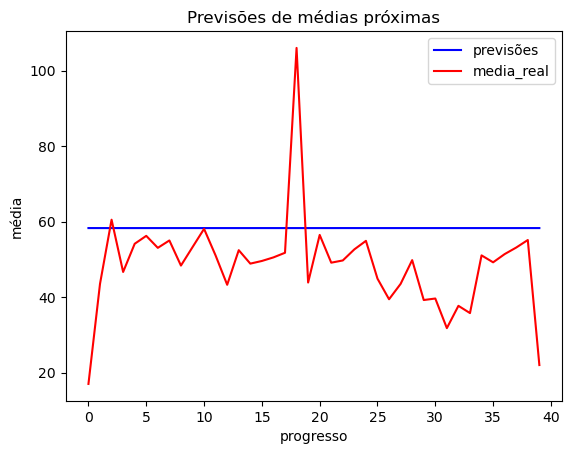

In [275]:
plt.plot(y_test, color = 'blue', label = 'previsões')
plt.plot(y_real, color = 'red', label = 'media_real')
plt.title('Previsões de médias próximas')
plt.xlabel('progresso')
plt.ylabel('média')
plt.legend()
plt.show()

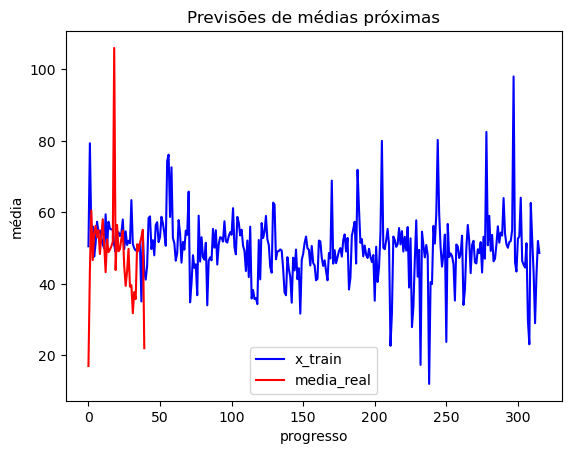

In [280]:
plt.plot(x_train, color = 'blue', label = 'x_train')
plt.plot(y_real, color = 'red', label = 'media_real')
plt.title('Previsões de médias próximas')
plt.xlabel('progresso')
plt.ylabel('média')
plt.legend()
plt.show()

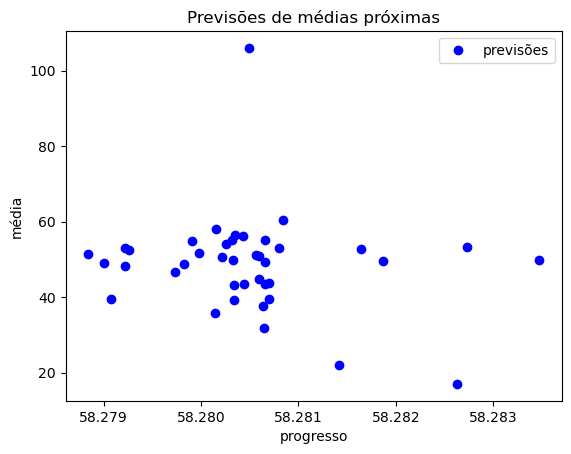

In [283]:
plt.plot(y_test,y_real ,'o',color = 'blue', label = 'previsões')
plt.title('Previsões de médias próximas')
plt.xlabel('progresso')
plt.ylabel('média')
plt.legend()
plt.show()